# 순환신경망(Recurrent Nerual Network) 출력값 살펴보기

![](http://i.imgur.com/jKodJ1u.png)

In [1]:
# hidden_state => vector
# vector size(hidden state shape == cell state : hyperparmaeter => 처음부터 끝까지 고정

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional

In [17]:
train_x = [[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 2.3, 2.4, 1.5, 3.1],
           [1.2, 2.1, 3.2, 2.2, 1.0],
           [0.2, 0.3, 1.2, 1.3, 2.0]
          ]

In [18]:
train_x_ar = np.array(train_x)

In [19]:
train_x_ar.shape

(4, 5)

In [31]:
train_x_ar_r = train_x_ar.reshape(1,4,5)

In [32]:
train_x_ar_r.shape

(1, 4, 5)

In [24]:
train_z = [[[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 2.3, 2.4, 1.5, 3.1],
           [1.2, 2.1, 3.2, 2.2, 1.0],
           [0.2, 0.3, 1.2, 1.3, 2.0]
          ],
           [[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 2.3, 2.4, 1.5, 3.1],
           [1.2, 2.1, 3.2, 2.2, 1.0],
           [0.2, 0.3, 1.2, 1.3, 2.0]
          ]]

In [25]:
train_z_ar = np.array(train_z)

In [29]:
np.array(train_z_ar).shape

(2, 4, 5)

## RNN 출력값 살펴보기 

### shape 형태

In [33]:
# [[v, v, v, v, v], [v, v, v, v, v], [v, v, v, v, v], [v, v, v, v, v]]
rnn = SimpleRNN(5, input_shape=(4,5)) # hiddenstate의 shape, input_shape = (seq_len, input_dim)
output = rnn(train_x_ar_r)

print(output) # 마지막 rnn cell 의 hidden state값

tf.Tensor([[-0.3767398  -0.96109396  0.9277037  -0.8697183  -0.5624354 ]], shape=(1, 5), dtype=float32)


In [34]:
hidden_state_size = 3

rnn = SimpleRNN(hidden_state_size, input_shape=(4,5), return_sequences=True) # rnn cell마다 hidden state값을 출력
output_1 = rnn(train_x_ar_r)
print(output_1) # rnn cell 마다의 hidden state값

tf.Tensor(
[[[ 0.9568488   0.28440353  0.99050754]
  [ 0.9973883   0.90371305 -0.27190065]
  [ 0.998177    0.8735651  -0.41468865]
  [ 0.98796636  0.9075211  -0.18795598]]], shape=(1, 4, 3), dtype=float32)


In [35]:
hidden_state_size = 3

rnn = SimpleRNN(hidden_state_size, input_shape=(4,5), return_sequences=True, return_state=True) # rnn cell마다 hidden state값을 출력
output_1, output_2 = rnn(train_x_ar_r)

print(output_1) # rnn cell 마다의 hidden state값
print(output_2) # 마지막 rnn cell 의 hidden state값

tf.Tensor(
[[[ 0.86388206 -0.99860036 -0.88033307]
  [ 0.996518   -0.8129765  -0.91519576]
  [ 0.9753208  -0.5808571  -0.88386005]
  [ 0.99563074 -0.37182677 -0.5639355 ]]], shape=(1, 4, 3), dtype=float32)
tf.Tensor([[ 0.99563074 -0.37182677 -0.5639355 ]], shape=(1, 3), dtype=float32)


In [39]:
hidden_state_size = 3

rnn = SimpleRNN(hidden_state_size, input_shape=(4,5), return_sequences=False, return_state=False)
output_1 = rnn(train_x_ar_r)

print(output_1) # rnn cell 마다의 hidden state값


tf.Tensor([[-0.942425    0.75883496 -0.9696767 ]], shape=(1, 3), dtype=float32)


## LSTM 출력값 살펴보기

In [41]:
lstm = LSTM(3)
output = lstm(train_x_ar_r)

print(output) # 마지막 cell의 hidden state값만 출력

tf.Tensor([[-0.35930216 -0.05958316  0.44322985]], shape=(1, 3), dtype=float32)


In [44]:
# return_state= True 시 

lstm = LSTM(3, return_state=True)
output_1 = lstm(train_x_ar_r)
print(output_1)

[<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.8919671 ,  0.18602505, -0.34199256]], dtype=float32)>, <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.8919671 ,  0.18602505, -0.34199256]], dtype=float32)>, <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-2.4659142,  0.7292801, -0.5225645]], dtype=float32)>]


In [43]:
# return_sequences= True : 모든 셀의 hidden_state 출력

lstm = LSTM(3, return_sequences=True)
output_1 = lstm(train_x_ar_r)
print(output_1)

tf.Tensor(
[[[ 0.05632742  0.01993735 -0.0248731 ]
  [ 0.07706689  0.07607211 -0.07532709]
  [ 0.05503419  0.09508669 -0.04825127]
  [ 0.13193704  0.20610796 -0.18775049]]], shape=(1, 4, 3), dtype=float32)


In [45]:

lstm = LSTM(3, return_sequences=True, return_state= True)
output_1, output_2, output_3 = lstm(train_x_ar_r)

print(output_1) # 모든 셀의 hidden state값을 출력
print(output_2) # 마지막 셀의 hidden state값을 출력
print(output_3) # 마지막 셀의 cell state값을 출력

tf.Tensor(
[[[-0.45312697  0.00336938 -0.09233103]
  [-0.390318    0.07626963  0.15734616]
  [-0.30161613  0.05520511 -0.2258054 ]
  [-0.4498668   0.3205226  -0.00266031]]], shape=(1, 4, 3), dtype=float32)
tf.Tensor([[-0.4498668   0.3205226  -0.00266031]], shape=(1, 3), dtype=float32)
tf.Tensor([[-1.250593    0.7727998  -0.00650894]], shape=(1, 3), dtype=float32)


## Bidirectional_LSTM 출력값 살펴보기

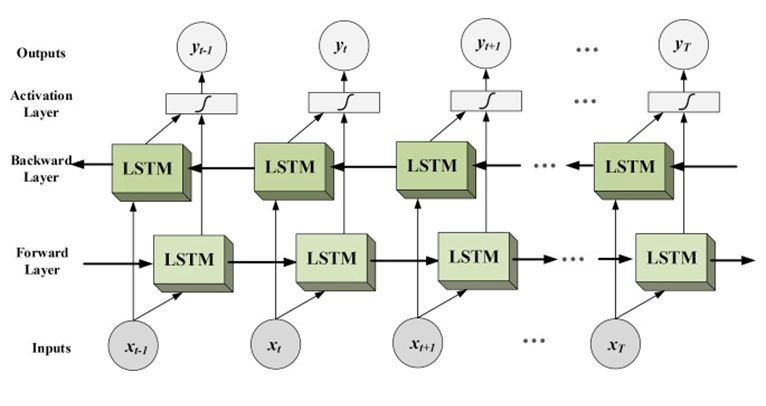

In [56]:
from IPython.display import Image
Image('bidirectionjpeg.jpeg')

In [48]:
bilstm = Bidirectional(LSTM(3))
hidden_states = bilstm(train_x_ar_r)

print(hidden_states) # 순방향 역방향의 hiddens state를 출력

tf.Tensor([[-0.05568488  0.0779635  -0.06447493  0.02801641 -0.00284716 -0.91532934]], shape=(1, 6), dtype=float32)


In [50]:
bilstm = Bidirectional(LSTM(3, return_sequences=True))
a = bilstm(train_x_ar_r)
print(a)

tf.Tensor(
[[[ 0.00854585 -0.07175904 -0.01021371  0.15940785 -0.4024086
    0.17235936]
  [-0.0402995  -0.09042812 -0.01279166  0.24006034 -0.15811226
    0.29669726]
  [-0.09045769 -0.0432291  -0.02692158  0.09682054 -0.19859457
    0.5764559 ]
  [-0.16735545 -0.10121166 -0.12172027  0.25495675  0.19022506
    0.25175282]]], shape=(1, 4, 6), dtype=float32)


In [55]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state = True))
a,b,c,d,e = bilstm(train_x_ar_r)

print(a)  # 마지막셀 
print(b)  # forward_h
print(c)  # forward_c
print(d)  # backward_h
print(e)  # backward_c

tf.Tensor([[-0.08393174 -0.2900732  -0.2791781   0.00372245 -0.06090768  0.74375975]], shape=(1, 6), dtype=float32)
tf.Tensor([[-0.08393174 -0.2900732  -0.2791781 ]], shape=(1, 3), dtype=float32)
tf.Tensor([[-0.13545524 -2.283151   -0.41994196]], shape=(1, 3), dtype=float32)
tf.Tensor([[ 0.00372245 -0.06090768  0.74375975]], shape=(1, 3), dtype=float32)
tf.Tensor([[ 0.1946648  -0.35784334  1.5613443 ]], shape=(1, 3), dtype=float32)


In [57]:
bilstm = Bidirectional(LSTM(3, return_sequences= True, return_state = True))
a,b,c,d,e = bilstm(train_x_ar_r)

print(a)  # 모든 셀의 hidden_state
print(b)  # forward_h
print(c)  # forward_c
print(d)  # backward_h
print(e)  # backward_c

tf.Tensor(
[[[ 0.01735009  0.21579614 -0.03894112  0.28649288  0.23115188
   -0.29956076]
  [-0.21472128  0.47849897 -0.14923723  0.4339252   0.15891695
   -0.63393104]
  [-0.27450526  0.5538184  -0.19340532  0.32568753  0.07052509
   -0.53261423]
  [-0.5015484   0.39271888 -0.13691132  0.12326299  0.09331542
   -0.4420601 ]]], shape=(1, 4, 6), dtype=float32)
tf.Tensor([[-0.5015484   0.39271888 -0.13691132]], shape=(1, 3), dtype=float32)
tf.Tensor([[-1.1289476  1.326621  -0.4077465]], shape=(1, 3), dtype=float32)
tf.Tensor([[ 0.28649288  0.23115188 -0.29956076]], shape=(1, 3), dtype=float32)
tf.Tensor([[ 2.0349376  0.3528611 -0.5441148]], shape=(1, 3), dtype=float32)
